# Income Prediction Using Random Forest Algorithm

Build a classification model to classify individuals on the basis of income level above or below $50,000 limit. Training of model shall be done on the basis of socio-economic, demographic, age, education, and employment related independent features.

### Importing all important libraries

In [1]:
!pip install -U imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.11.0
    Uninstalling imbalanced-learn-0.11.0:
      Successfully uninstalled imbalanced-learn-0.11.0


In [2]:
!pip show imbalanced-learn

Name: imbalanced-learn
Version: 0.12.0
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: /opt/conda/lib/python3.10/site-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: 


In [3]:
!pip install xgboost

In [4]:
!pip install lightgbm

In [5]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
import xgboost as xgb
import lightgbm as lgb
from joblib import load
from joblib import dump
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE 

In [6]:
!pip show scikit-learn #check version of scikit-learn 

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /opt/conda/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bayesian-optimization, Boruta, category-encoders, cesium, eli5, esda, fastai, gplearn, hep-ml, hmmlearn, hpsklearn, hypertools, imbalanced-learn, kmapper, kmodes, librosa, lime, mapclassify, mlxtend, nilearn, pyLDAvis, pynndescent, qudida, rgf-python, scattertext, scikit-learn-intelex, scikit-optimize, scikit-plot, segregation, shap, sklearn-pandas, spopt, spreg, TPOT, tsfresh, umap-learn, vecstack, woodwork, yellowbrick


### Data Loading

In [7]:
# Loading training data
train_data = pd.read_csv(r"/kaggle/input/data-for-income-prediction/Train.csv")

In [8]:
# Checking elements of training data
train_data.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

Information of training data shows that multiple columns have null values however, data type for all features is correct

In [10]:
train_data.describe()

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
count,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000
mean,34.518728,0.176760,55.433487,23.158850,15.332398,11.321734,1.956067,1.515854,435.926887,36.881737,194.533420,94.499745,1740.888324
std,22.306738,0.555562,276.757327,24.397963,18.049655,14.460839,2.365154,0.850853,4696.359500,270.383302,1956.375501,0.500001,995.559557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,37.870000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1061.290000
50%,33.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1617.040000
75%,50.000000,0.000000,0.000000,52.000000,33.000000,26.000000,4.000000,2.000000,0.000000,0.000000,0.000000,95.000000,2185.480000
max,90.000000,2.000000,9999.000000,52.000000,51.000000,46.000000,6.000000,2.000000,99999.000000,4608.000000,99999.000000,95.000000,18656.300000


Descriptive statistics of training data shows that many values are centered about 0 hence, data processing is needed

In [11]:
train_df = train_data #Creating a copy of a dataframe

### Exploratory Data Analysis

Univariate Analysis

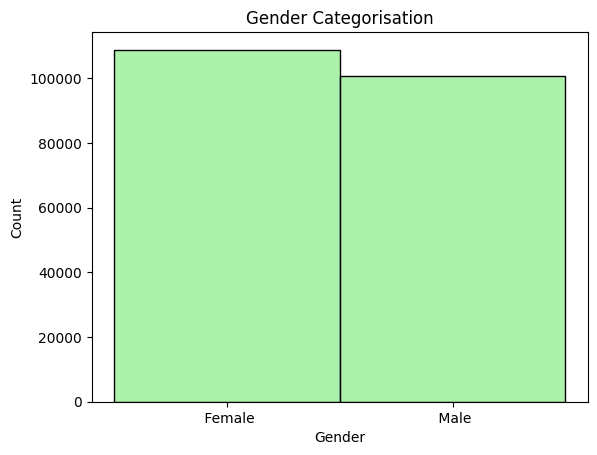

In [12]:
# Finding propotion of gender
sns.histplot(data=train_data, x='gender',color='lightgreen')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Categorisation')
plt.show()

There are more female candidates than male ones and hence, this might be reflected in income levels 

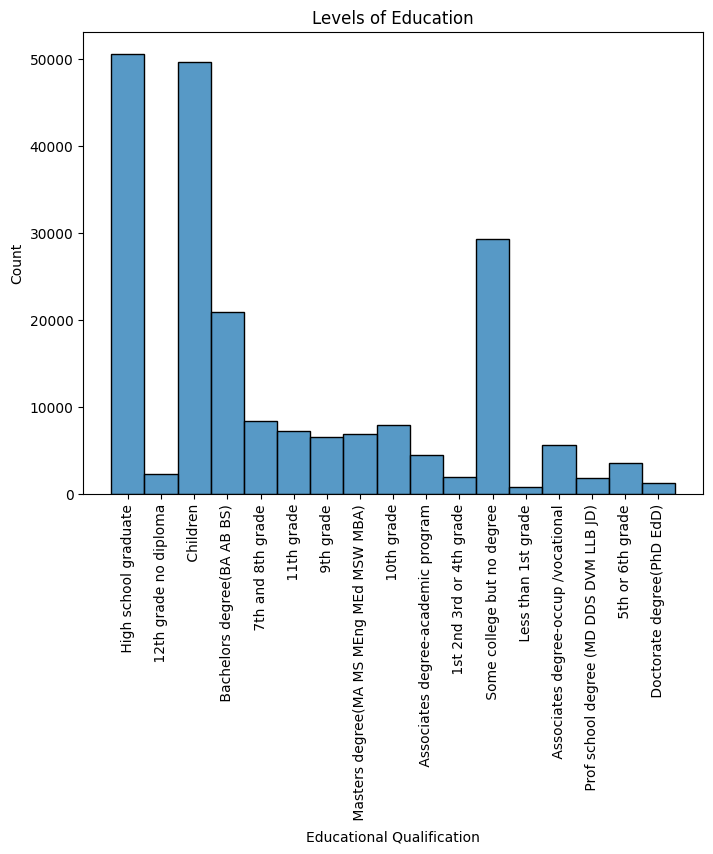

In [13]:
# Finding propotion of education

plt.figure(figsize=(8,6))

sns.histplot(data=train_data, x='education')

plt.xlabel('Educational Qualification')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Levels of Education')
plt.show()

Some of the candidates are High school graduate, children, and some college without degree hence, probably below limit income level might be more

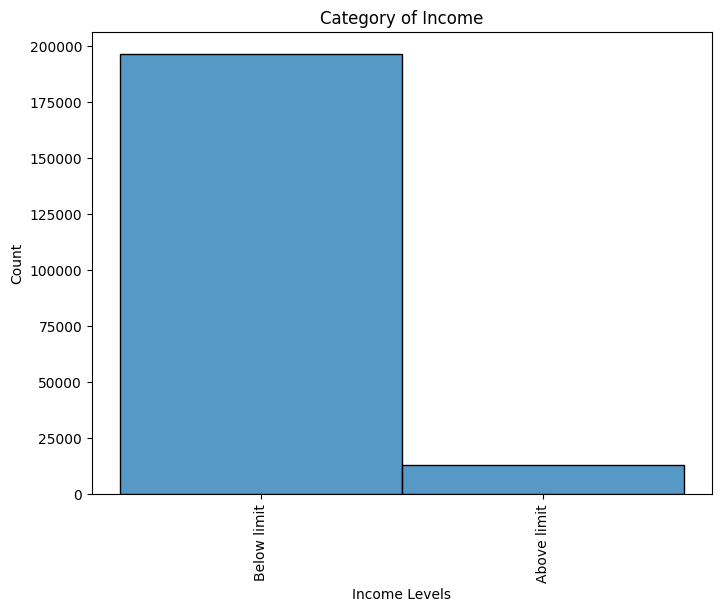

In [14]:
# Finding income levels which is the target variable

plt.figure(figsize=(8,6))

sns.histplot(data=train_data, x='income_above_limit')

plt.xlabel('Income Levels')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Category of Income')
plt.show()

The above chart shows that target variable is mostly about one class hence, data is imbalanced

In [15]:
len(train_data[train_data['income_above_limit']=='Below limit'])

196501

In [16]:
len(train_data) #only 7% of data is above limit as income level

209499

Transforming data for easier visualisation 

In [17]:
train_data['class'] = train_data['class'].str.strip().replace(['Self-employed-not incorporated','Self-employed-incorporated'],'Self-Employed')
train_data['class'] = train_data['class'].str.strip().replace(['Local government','State government','Federal government'],'Goverment-Employed')
train_data['class'] = train_data['class'].str.strip().replace(['Never worked','Without pay'],'Not Working')

In [18]:
train_data['marital_status'] = train_data['marital_status'].str.strip().replace(['Never married','Divorced','Widowed','Separated'],'Single')
train_data['marital_status'] = train_data['marital_status'].str.strip().replace(['Married-civilian spouse present', 'Married-spouse absent', 'Married-A F spouse present'], 'Married')

In [19]:
train_data['is_hispanic'] = train_data['is_hispanic'].str.strip().replace(['Mexican-American','Chicano'],'Mexican American')
train_data['is_hispanic'] = train_data['is_hispanic'].str.strip().replace(['NA','Do not know'],'Not Known')
train_data['is_hispanic'].value_counts()

is_hispanic
All other                    180404
Mexican American               8840
Mexican (Mexicano)             7614
Central or South American      4176
Puerto Rican                   3435
Other Spanish                  2612
Cuban                          1231
Not Known                      1187
Name: count, dtype: int64

In [20]:
train_data['employment_commitment'] = train_data['employment_commitment'].str.strip().replace('Full-time schedules','Full-Time Employed')
train_data['employment_commitment'] = train_data['employment_commitment'].str.strip().replace(['Not in labor force','Unemployed full-time','Unemployed part- time'], 'Unemployed')
train_data['employment_commitment'] = train_data['employment_commitment'].str.strip().replace(['PT for non-econ reasons usually FT','PT for econ reasons usually PT','PT for econ reasons usually FT'],'Part-Time Employed')
train_data['employment_commitment'].value_counts()

employment_commitment
Children or Armed Forces    129789
Full-Time Employed           42787
Unemployed                   31591
Part-Time Employed            5332
Name: count, dtype: int64

In [21]:
train_data['industry_code_main'] = train_data['industry_code_main'].str.strip().replace(['Manufacturing-durable goods','Manufacturing-nondurable goods'],'Manufacturing')
train_data['industry_code_main'].value_counts() 

industry_code_main
Not in universe or children            105694
Retail trade                            18040
Manufacturing                           16568
Education                                8739
Construction                             6414
Finance insurance and real estate        6336
Business and repair services             6021
Medical except hospital                  4934
Public administration                    4706
Other professional services              4627
Transportation                           4419
Hospital services                        4088
Wholesale trade                          3846
Agriculture                              3157
Personal services except private HH      3056
Social services                          2677
Entertainment                            1779
Communications                           1260
Utilities and sanitary services          1238
Private household services               1028
Mining                                    639
Forestry and fi

In [22]:
train_data['household_stat'] = train_data['household_stat'].str.strip().replace(['Householder','Nonfamily householder'],'Householder')
train_data['household_stat'] = train_data['household_stat'].str.strip().replace(['Child <18 never marr not in subfamily','Child under 18 of RP of unrel subfamily','Child <18 never marr RP of subfamily','Child <18 ever marr not in subfamily','Child <18 ever marr RP of subfamily','Child <18 spouse of subfamily RP'],'Child <18')
train_data['household_stat'] = train_data['household_stat'].str.strip().replace(['Child 18+ never marr Not in a subfamily','Child 18+ ever marr Not in a subfamily','Child 18+ never marr RP of subfamily','Child 18+ ever marr RP of subfamily','Child 18+ spouse of subfamily RP'],'Child 18+')
train_data['household_stat'] = train_data['household_stat'].str.strip().replace(['Other Rel 18+ ever marr not in subfamily','Other Rel 18+ never marr not in subfamily','Other Rel 18+ spouse of subfamily RP','Other Rel 18+ ever marr RP of subfamily','Other Rel 18+ never marr RP of subfamily'],'Other Rel 18+')
train_data['household_stat'] = train_data['household_stat'].str.strip().replace(['Other Rel <18 never marr child of subfamily RP','Other Rel <18 never marr not in subfamily','Other Rel <18 ever marr RP of subfamily','Other Rel <18 ever marr not in subfamily','Other Rel <18 never married RP of subfamily','Other Rel <18 spouse of subfamily RP'],'Other Rel <18')
train_data['household_stat'] = train_data['household_stat'].str.strip().replace(['Grandchild <18 never marr child of subfamily RP','Grandchild <18 never marr not in subfamily','Grandchild <18 ever marr not in subfamily','Grandchild <18 never marr RP of subfamily'],'Grandchild <18')
train_data['household_stat'] = train_data['household_stat'].str.strip().replace(['Grandchild 18+ never marr not in subfamily','Grandchild 18+ ever marr not in subfamily','Grandchild 18+ ever marr RP of subfamily','Grandchild 18+ spouse of subfamily RP','Grandchild 18+ never marr RP of subfamily'],'Grandchild 18+')
train_data['household_stat'].value_counts()

household_stat
Householder                            79450
Child <18                              53583
Spouse of householder                  43579
Child 18+                              15260
Secondary individual                    6509
Other Rel 18+                           5337
Grandchild <18                          3055
Other Rel <18                           1296
RP of unrelated subfamily                723
Grandchild 18+                           464
In group quarters                        185
Spouse of RP of unrelated subfamily       58
Name: count, dtype: int64

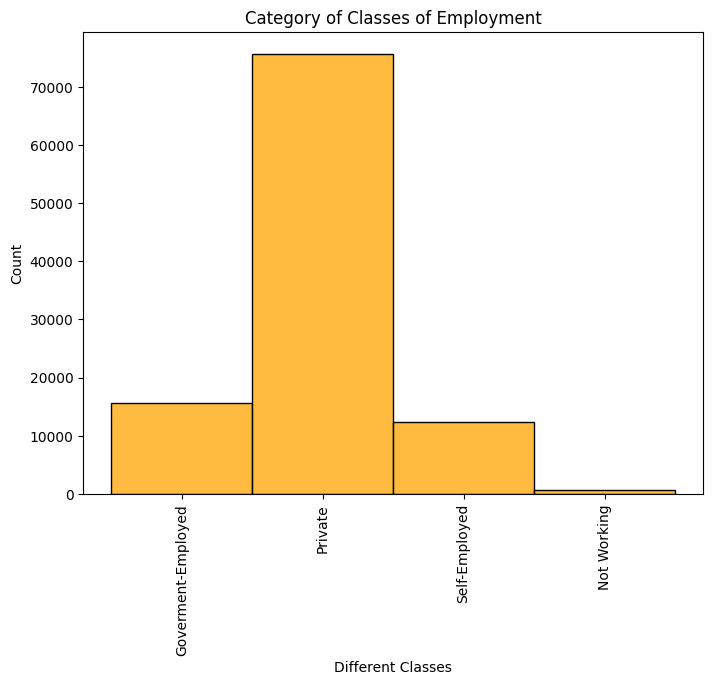

In [23]:
# Finding Different Classes of Employment

plt.figure(figsize=(8,6))

sns.histplot(data=train_data, x='class', color='orange')

plt.xlabel('Different Classes')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Category of Classes of Employment')
plt.show()

In [24]:
#Checking count of all values 
train_data['class'].value_counts()

class
Private               75617
Goverment-Employed    15620
Self-Employed         12401
Not Working             616
Name: count, dtype: int64

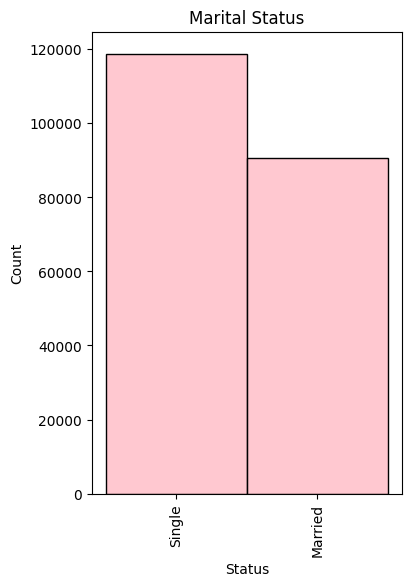

In [25]:
# Finding Different Marital Status 

plt.figure(figsize=(4,6))

sns.histplot(data=train_data, x='marital_status', color='lightpink')

plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Marital Status')
plt.show()

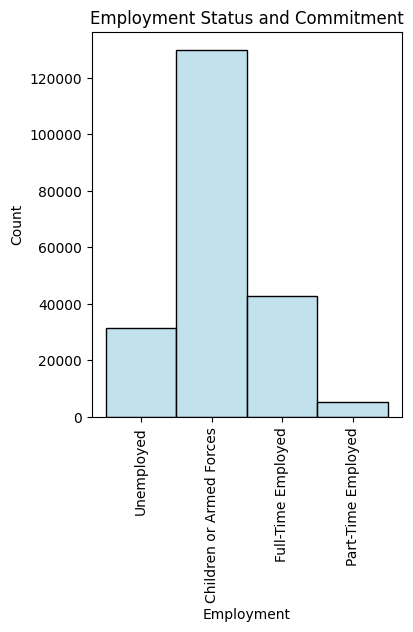

In [26]:
# Analysing employment status 

plt.figure(figsize=(4,5))

sns.histplot(data=train_data, x='employment_commitment', color='lightblue')

plt.xlabel('Employment')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Employment Status and Commitment')
plt.show()

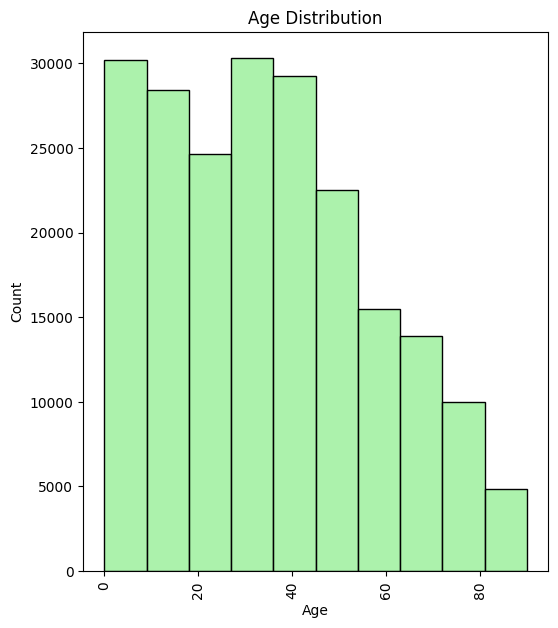

In [27]:
# Unnderstanding age distribution

plt.figure(figsize=(6,7))

sns.histplot(data=train_data, bins=10, x='age', color='lightgreen')

plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Age Distribution')
plt.show()

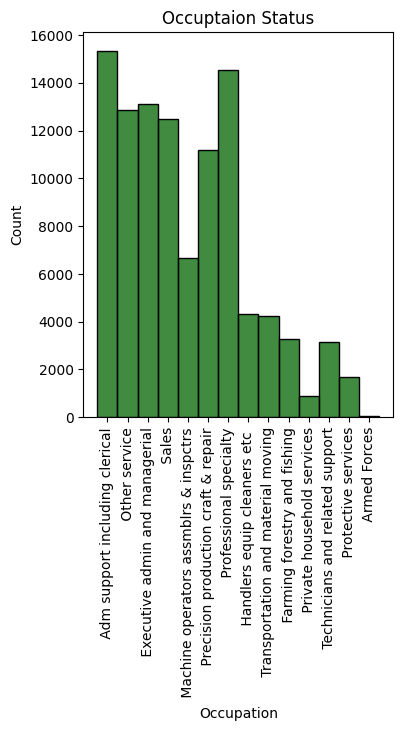

In [28]:
# Analysing different occupations

plt.figure(figsize=(4,5))

sns.histplot(data=train_data, x='occupation_code_main', color='darkgreen')

plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Occuptaion Status')
plt.show()

In [29]:
train_data['occupation_code_main'].value_counts() #Different occupations

occupation_code_main
Adm support including clerical           15351
Professional specialty                   14544
Executive admin and managerial           13107
Other service                            12856
Sales                                    12487
Precision production craft & repair      11207
Machine operators assmblrs & inspctrs     6650
Handlers equip cleaners etc               4340
Transportation and material moving        4244
Farming forestry and fishing              3273
Technicians and related support           3136
Protective services                       1700
Private household services                 878
Armed Forces                                32
Name: count, dtype: int64

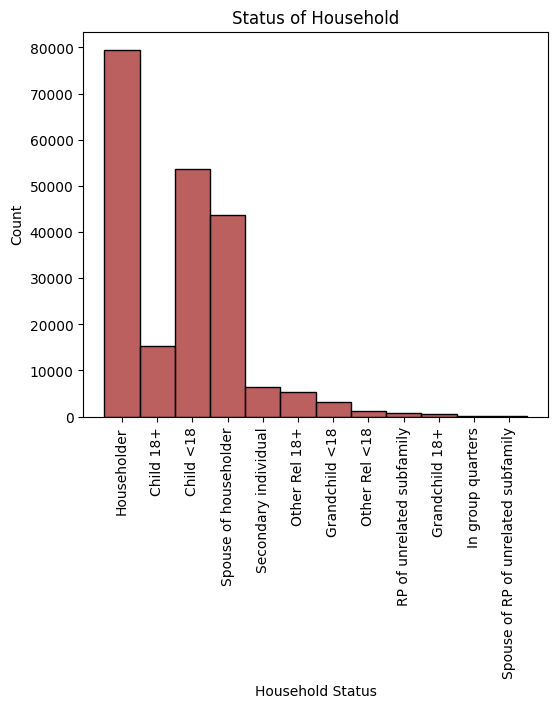

In [30]:
# Analysing Household statistics 

plt.figure(figsize=(6,5))

sns.histplot(data=train_data, x='household_stat', color='brown')

plt.xlabel('Household Status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Status of Household')
plt.show()

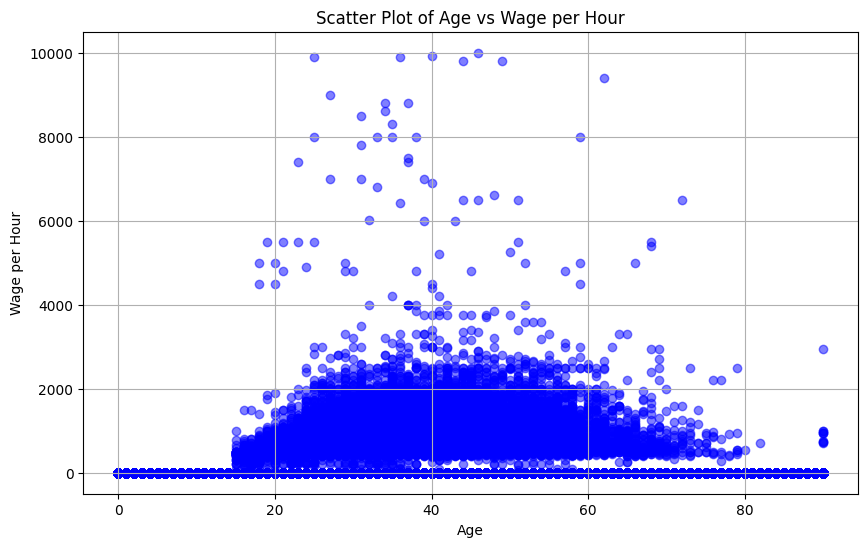

In [31]:
# Getting age and wage_per_hour columns
age = train_data['age']
wage_per_hour = train_data['wage_per_hour']

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(age, wage_per_hour, color='blue', alpha=0.5)
plt.title('Scatter Plot of Age vs Wage per Hour')
plt.xlabel('Age')
plt.ylabel('Wage per Hour')
plt.grid(True)
plt.show()

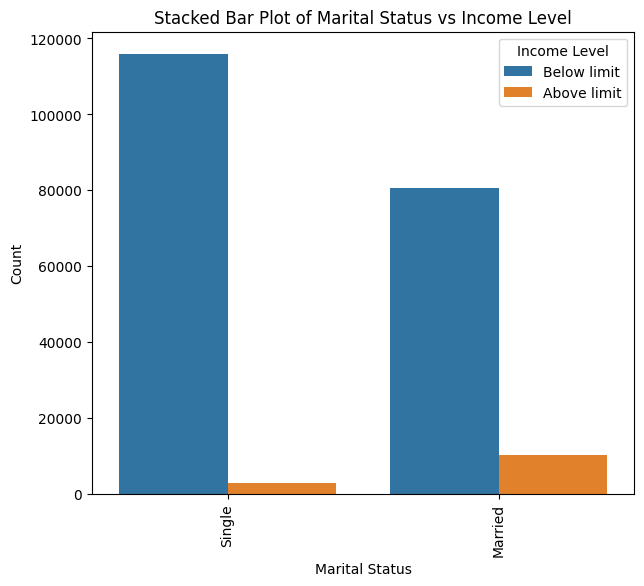

In [32]:
#Income versus marital status 
plt.figure(figsize=(7, 6))
sns.countplot(data=train_data, x='marital_status', hue='income_above_limit')
plt.title('Stacked Bar Plot of Marital Status vs Income Level')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Income Level')
plt.show()

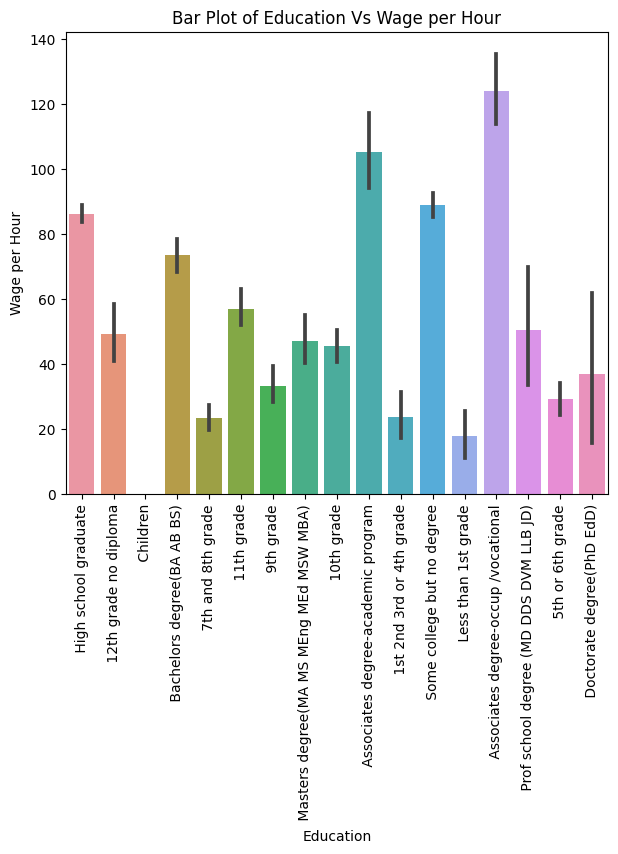

In [33]:
# Education versus wage per hour
plt.figure(figsize=(7, 6))
sns.barplot(data=train_data, x='education', y='wage_per_hour')
plt.title('Bar Plot of Education Vs Wage per Hour')
plt.xlabel('Education')
plt.ylabel('Wage per Hour')
plt.xticks(rotation=90) 
plt.show()

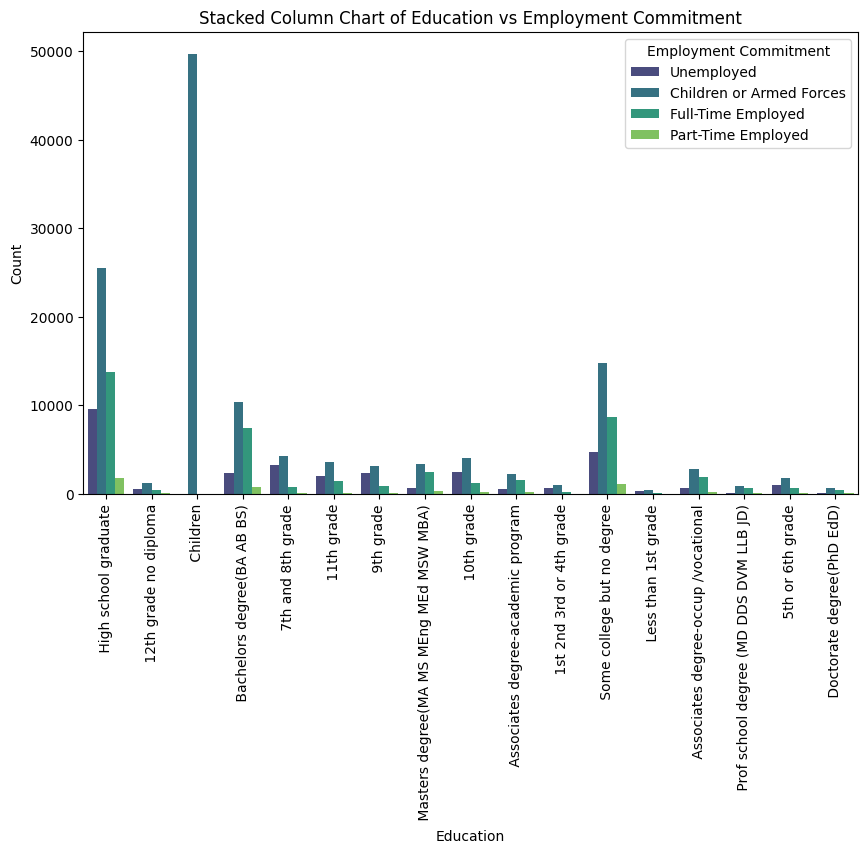

In [34]:
#Plot Column chart of Education versus Employment Commitment
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='education', hue='employment_commitment', palette='viridis')
plt.title('Stacked Column Chart of Education vs Employment Commitment')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.legend(title='Employment Commitment')
plt.show()

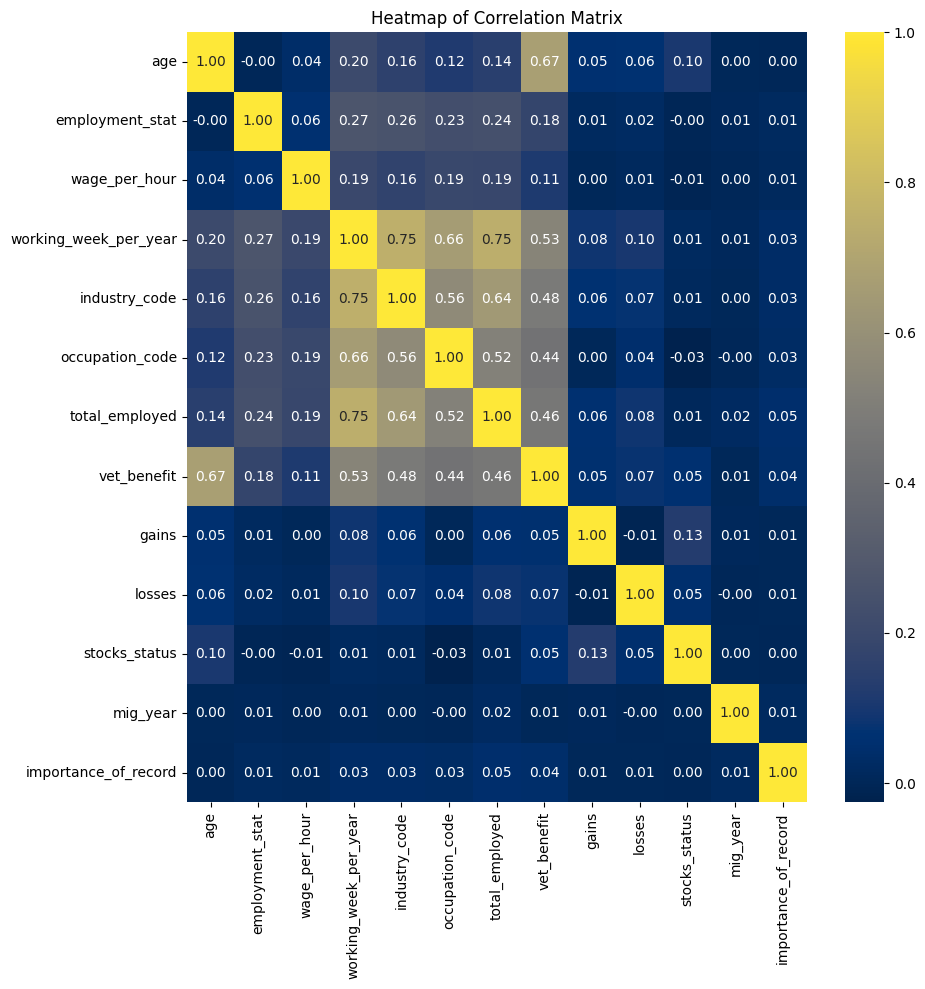

In [35]:
#Plotting a heatmap for all features
train_datanew = train_data.select_dtypes(include='number')
plt.figure(figsize=(10, 10))
sns.heatmap(train_datanew.corr(), annot=True, cmap='cividis', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

### Data Pre-Processing

In [36]:
#Checking null values
train_df.isnull().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

Following columns need to be worked upon for missing values: classs, education_institute, is_labor_union,under_18_famil, veterans_admin_questionnaire, migration_code_change_in_msa,migration_prev_sunbelt, migration_code_move_within_reg, migration_code_change_in_reg, residence_1_year_ago, old_residence_reg, old_residence_state

In [37]:
len(train_df) #length of training data

209499

In [38]:
#Following columns can be deleted as more than 50% of values are missing: 
train_df.drop(columns=['education_institute','unemployment_reason','is_labor_union','under_18_family','veterans_admin_questionnaire','old_residence_reg','old_residence_state'], inplace=True)
train_df.head()

,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,...,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,Single,White,All other,Unemployed,0,...,US,US,US,?,?,?,?,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,Single,White,All other,Children or Armed Forces,0,...,US,US,US,unchanged,NaN,unchanged,unchanged,Same,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Goverment-Employed,Single,Black,All other,Children or Armed Forces,0,...,US,US,US,unchanged,NaN,unchanged,unchanged,Same,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,Single,Asian or Pacific Islander,All other,Children or Armed Forces,0,...,US,India,India,unchanged,NaN,unchanged,unchanged,Same,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,Married,White,All other,Unemployed,0,...,US,US,US,?,?,?,?,NaN,1580.79,Below limit


In [39]:
train_df.isnull().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
employment_stat                        0
wage_per_hour                          0
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
vet_benefit                            0
tax_status                             0
gains                                  0
losses                                 0
stocks_status                          0
citizenship     

In [40]:
# Checking which columns have '?' as value
train_df.apply(lambda x: x.str.strip().eq('?') if x.dtype == 'object' else False, axis=0).sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                                  0
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
employment_stat                        0
wage_per_hour                          0
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main                   0
total_employed                         0
household_stat                         0
household_summary                      0
vet_benefit                            0
tax_status                             0
gains                                  0
losses                                 0
stocks_status                          0
citizenship     

In [41]:
(train_df['migration_code_move_within_reg'].str.strip() == '?').sum()

104696

In [42]:
question_mark_count = (train_df['migration_code_move_within_reg'].str.strip() == '?').sum() + train_df['migration_code_move_within_reg'].isna().sum()
question_mark_count #total ? and null values

106284

In [43]:
# Columns 'migration_code_change_in_msa', 'migration_prev_sunbelt', 'migration_code_move_within_reg', 'migration_code_change_in_reg' have huge (almost 50%) values of '?'
# If all these values are imputed then, it will result in bias and altered results thus, let's drop these columns
train_df.drop(columns=['migration_code_change_in_msa', 'migration_prev_sunbelt', 'migration_code_move_within_reg', 'migration_code_change_in_reg'],inplace=True)
train_df.head()

,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,...,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,residence_1_year_ago,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,Single,White,All other,Unemployed,0,...,0,292,Native,95,US,US,US,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,Single,White,All other,Children or Armed Forces,0,...,0,0,Native,94,US,US,US,Same,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Goverment-Employed,Single,Black,All other,Children or Armed Forces,0,...,0,0,Native,94,US,US,US,Same,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,Single,Asian or Pacific Islander,All other,Children or Armed Forces,0,...,0,0,Native,94,US,India,India,Same,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,Married,White,All other,Unemployed,0,...,0,0,Native,95,US,US,US,NaN,1580.79,Below limit


In [44]:
train_df.apply(lambda x: x.str.strip().eq('?') if x.dtype == 'object' else False, axis=0).sum()

ID                            0
age                           0
gender                        0
education                     0
class                         0
marital_status                0
race                          0
is_hispanic                   0
employment_commitment         0
employment_stat               0
wage_per_hour                 0
working_week_per_year         0
industry_code                 0
industry_code_main            0
occupation_code               0
occupation_code_main          0
total_employed                0
household_stat                0
household_summary             0
vet_benefit                   0
tax_status                    0
gains                         0
losses                        0
stocks_status                 0
citizenship                   0
mig_year                      0
country_of_birth_own       3667
country_of_birth_father    7181
country_of_birth_mother    6516
residence_1_year_ago          0
importance_of_record          0
income_a

In [45]:
# Replace '?' values with NaN
train_df['country_of_birth_own'] = train_df['country_of_birth_own'].str.strip().replace('?', np.nan)
train_df['country_of_birth_father'] = train_df['country_of_birth_father'].str.strip().replace('?', np.nan)
train_df['country_of_birth_mother'] = train_df['country_of_birth_mother'].str.strip().replace('?', np.nan) 

In [46]:
train_df.apply(lambda x: x.str.strip().eq('?') if x.dtype == 'object' else False, axis=0).sum()

ID                         0
age                        0
gender                     0
education                  0
class                      0
marital_status             0
race                       0
is_hispanic                0
employment_commitment      0
employment_stat            0
wage_per_hour              0
working_week_per_year      0
industry_code              0
industry_code_main         0
occupation_code            0
occupation_code_main       0
total_employed             0
household_stat             0
household_summary          0
vet_benefit                0
tax_status                 0
gains                      0
losses                     0
stocks_status              0
citizenship                0
mig_year                   0
country_of_birth_own       0
country_of_birth_father    0
country_of_birth_mother    0
residence_1_year_ago       0
importance_of_record       0
income_above_limit         0
dtype: int64

In [47]:
object_columns = train_df.select_dtypes(include=['object']).columns.tolist()
object_columns.remove('ID')

In [48]:
# Replacing Null values with mode values:
for column in object_columns:
    train_df[column].fillna(train_df[column].mode()[0],inplace=True)

In [49]:
object_columns

['gender',
 'education',
 'class',
 'marital_status',
 'race',
 'is_hispanic',
 'employment_commitment',
 'industry_code_main',
 'occupation_code_main',
 'household_stat',
 'household_summary',
 'tax_status',
 'citizenship',
 'country_of_birth_own',
 'country_of_birth_father',
 'country_of_birth_mother',
 'residence_1_year_ago',
 'income_above_limit']

In [50]:
train_df.head()

,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,...,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,residence_1_year_ago,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,Private,Single,White,All other,Unemployed,0,...,0,292,Native,95,US,US,US,Same,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,Private,Single,White,All other,Children or Armed Forces,0,...,0,0,Native,94,US,US,US,Same,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Goverment-Employed,Single,Black,All other,Children or Armed Forces,0,...,0,0,Native,94,US,US,US,Same,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,Private,Single,Asian or Pacific Islander,All other,Children or Armed Forces,0,...,0,0,Native,94,US,India,India,Same,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,Private,Married,White,All other,Unemployed,0,...,0,0,Native,95,US,US,US,Same,1580.79,Below limit


In [51]:
train_df.isnull().sum()

ID                         0
age                        0
gender                     0
education                  0
class                      0
marital_status             0
race                       0
is_hispanic                0
employment_commitment      0
employment_stat            0
wage_per_hour              0
working_week_per_year      0
industry_code              0
industry_code_main         0
occupation_code            0
occupation_code_main       0
total_employed             0
household_stat             0
household_summary          0
vet_benefit                0
tax_status                 0
gains                      0
losses                     0
stocks_status              0
citizenship                0
mig_year                   0
country_of_birth_own       0
country_of_birth_father    0
country_of_birth_mother    0
residence_1_year_ago       0
importance_of_record       0
income_above_limit         0
dtype: int64

In [52]:
train_df['gains'].value_counts()

gains
0        201669
15024       830
7298        608
7688        604
99999       409
          ...  
2601          1
1090          1
8530          1
1639          1
2387          1
Name: count, Length: 132, dtype: int64

In [53]:
train_df['losses'].value_counts()

losses
0       205437
1902       448
1977       405
1887       365
1602       210
         ...  
1640         2
2754         2
1956         1
2519         1
2769         1
Name: count, Length: 114, dtype: int64

In [54]:
train_df['stocks_status'].value_counts()

stocks_status
0       187467
100       1202
500       1061
200        969
1000       948
         ...  
1085         1
3396         1
358          1
627          1
3508         1
Name: count, Length: 1499, dtype: int64

In [55]:
train_df['wage_per_hour'].value_counts()

wage_per_hour
0       197643
500        777
600        585
700        572
800        512
         ...  
2226         1
3190         1
5250         1
3500         1
557          1
Name: count, Length: 1232, dtype: int64

Values in columns 'gains', 'losses', 'stocks_status', 'wage_per_hour' have extremely skewed distribution 

In [56]:
# Values in columns 'gains', 'losses', 'stocks_status', 'wage_per_hour' have extremely skewed distribution 
numeric_columns = train_df.select_dtypes(include=['int', 'float'])
numeric_columns

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
0,79,0,0,52,0,0,2,2,0,0,292,95,1779.74
1,65,0,0,0,0,0,0,2,0,0,0,94,2366.75
2,21,0,500,15,41,26,4,2,0,0,0,94,1693.42
3,2,0,0,0,0,0,0,0,0,0,0,94,1380.27
4,70,0,0,0,0,0,0,2,0,0,0,95,1580.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,16,0,0,0,0,0,0,2,0,0,0,95,2170.60
209495,78,0,0,0,0,0,0,2,0,0,71,95,1029.57
209496,8,0,0,0,0,0,0,0,0,0,0,95,791.61
209497,26,0,700,52,32,42,4,2,0,0,0,94,3530.26


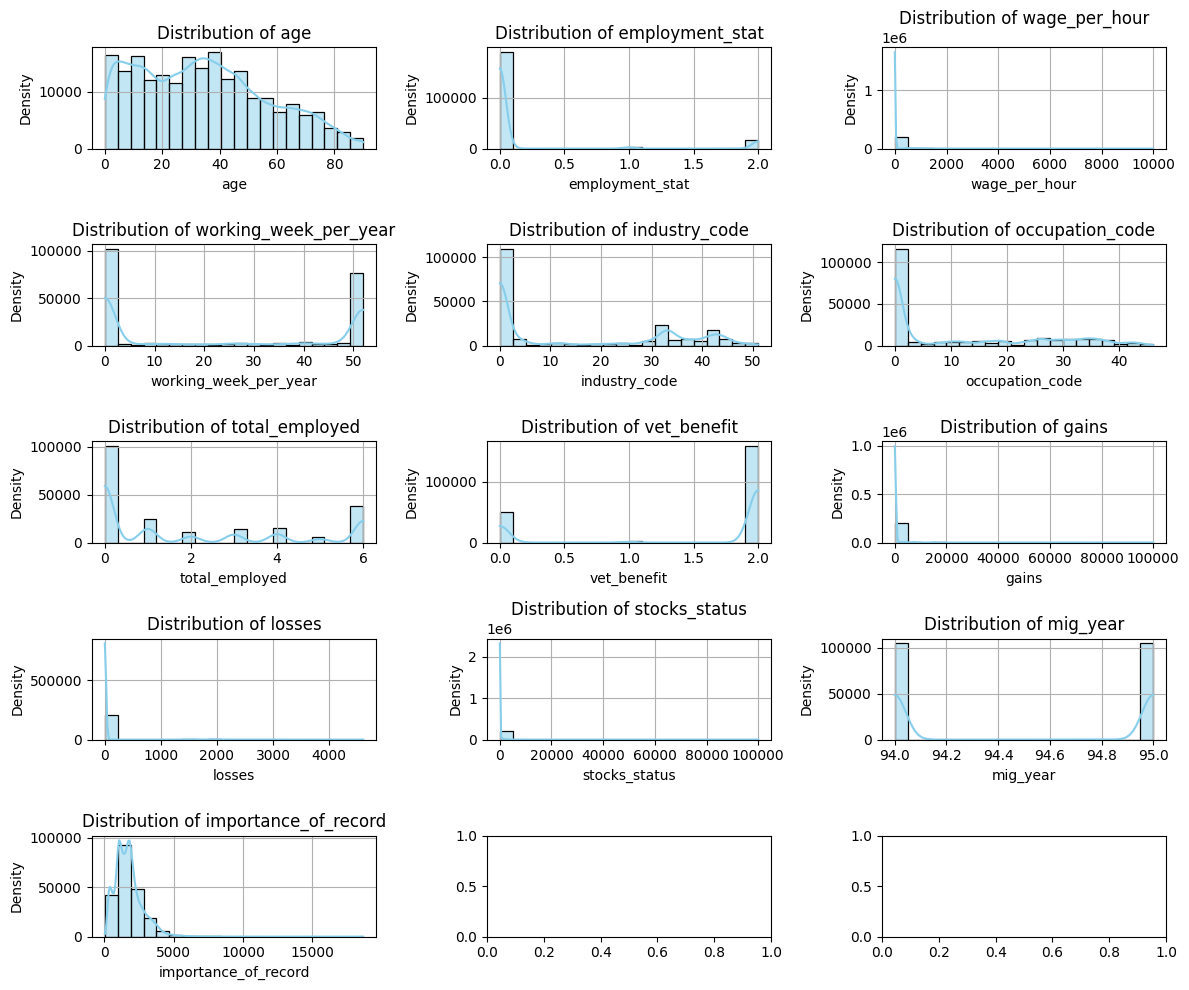

In [57]:
#Plotting distribution for all numeric features
num_rows = 5
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

axes = axes.flatten()

for i, column in enumerate(numeric_columns.columns):
    sns.histplot(numeric_columns[column], bins=20, kde=True, color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel('Density', fontsize=10)
    axes[i].grid(True)

plt.tight_layout()
plt.show()


In [58]:
train_df['employment_stat'].value_counts()

employment_stat
0    189556
2     17088
1      2855
Name: count, dtype: int64

In [59]:
train_df['wage_per_hour'].value_counts() #Yes left/positively Skewed distribution

wage_per_hour
0       197643
500        777
600        585
700        572
800        512
         ...  
2226         1
3190         1
5250         1
3500         1
557          1
Name: count, Length: 1232, dtype: int64

Applying logarithmic transformation for following columns: 'wage_per_hour', gains, losses, stocks_status, 

In [60]:
# Extracting featurs and target variable 
features_data = train_df.iloc[:,:-1]
targetvariable = train_df.iloc[:,-1]

In [61]:
features_data.head()

,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,...,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,residence_1_year_ago,importance_of_record
0,ID_TZ0000,79,Female,High school graduate,Private,Single,White,All other,Unemployed,0,...,0,0,292,Native,95,US,US,US,Same,1779.74
1,ID_TZ0001,65,Female,High school graduate,Private,Single,White,All other,Children or Armed Forces,0,...,0,0,0,Native,94,US,US,US,Same,2366.75
2,ID_TZ0002,21,Male,12th grade no diploma,Goverment-Employed,Single,Black,All other,Children or Armed Forces,0,...,0,0,0,Native,94,US,US,US,Same,1693.42
3,ID_TZ0003,2,Female,Children,Private,Single,Asian or Pacific Islander,All other,Children or Armed Forces,0,...,0,0,0,Native,94,US,India,India,Same,1380.27
4,ID_TZ0004,70,Male,High school graduate,Private,Married,White,All other,Unemployed,0,...,0,0,0,Native,95,US,US,US,Same,1580.79


In [62]:
# Checking the target variable 
targetvariable

0         Below limit
1         Below limit
2         Below limit
3         Below limit
4         Below limit
             ...     
209494    Below limit
209495    Below limit
209496    Below limit
209497    Below limit
209498    Below limit
Name: income_above_limit, Length: 209499, dtype: object

In [63]:
# Applying logarithmic transformation
skewed = ['wage_per_hour', 'gains', 'losses', 'stocks_status']
features_data[skewed] = features_data[skewed].apply(lambda x: np.log(x + 1)) 

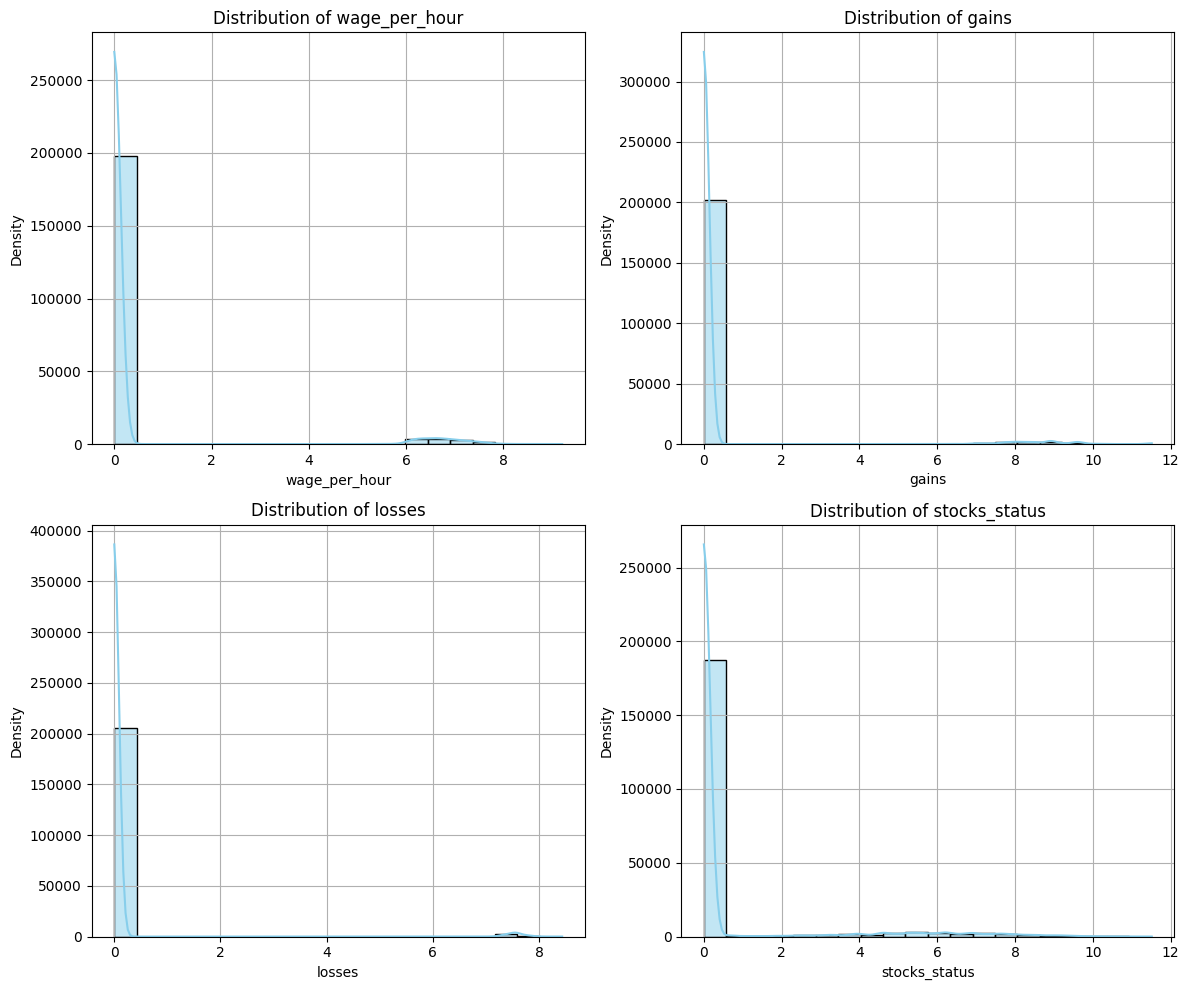

In [64]:
num_rows = 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

axes = axes.flatten()

for i, column in enumerate(skewed):
    sns.histplot(features_data[column], bins=20, kde=True, color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel('Density', fontsize=10)
    axes[i].grid(True)

plt.tight_layout()

plt.show() 

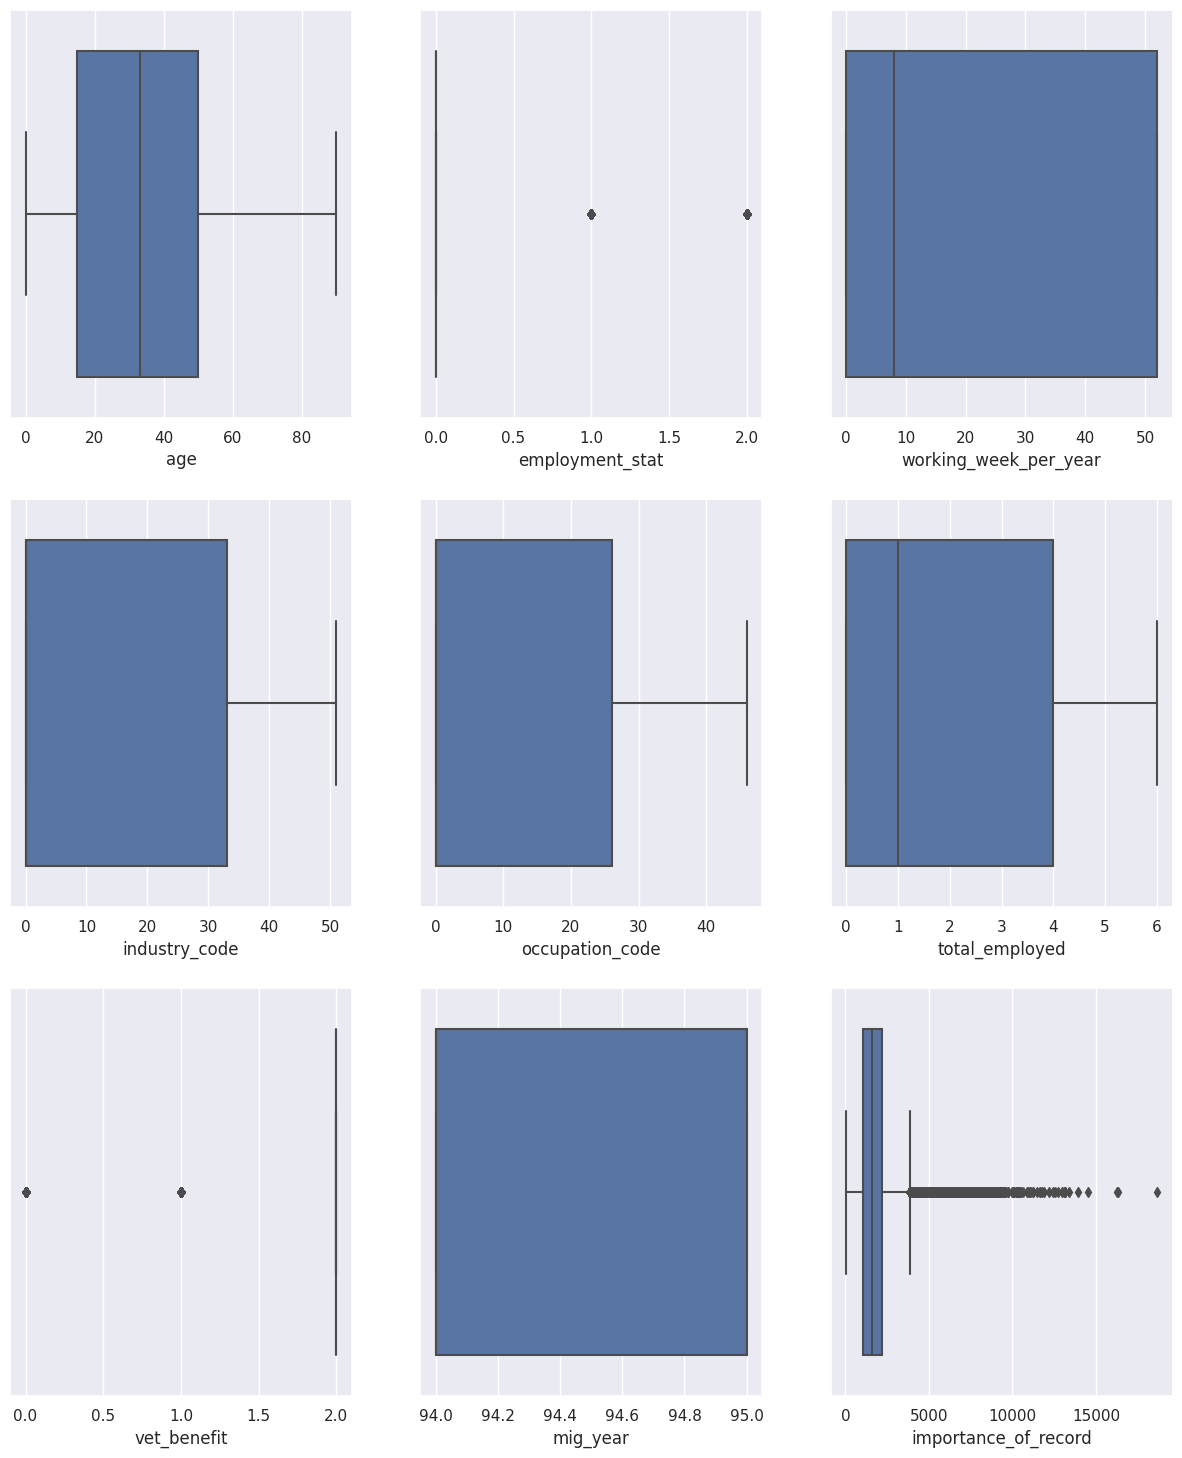

In [65]:
# Plotting boxplots for all features 
sns.set()
fig, axes = plt.subplots(3,3,figsize=(15,18))
sns.boxplot(x=features_data['age'], ax=axes[0,0], whis=1.5)
sns.boxplot(x=features_data['employment_stat'], ax=axes[0,1], whis=1.5)
sns.boxplot(x=features_data['working_week_per_year'], ax=axes[0,2], whis=1.5)
sns.boxplot(x=features_data['industry_code'], ax=axes[1,0], whis=1.5)
sns.boxplot(x=features_data['occupation_code'], ax=axes[1,1], whis=1.5)
sns.boxplot(x=features_data['total_employed'], ax=axes[1,2], whis=1.5)
sns.boxplot(x=features_data['vet_benefit'], ax=axes[2,0], whis=1.5)
sns.boxplot(x=features_data['mig_year'], ax=axes[2,1], whis=1.5)
sns.boxplot(x=features_data['importance_of_record'], ax=axes[2,2], whis=1.5)
plt.show()

In [66]:
#Defining function for outlier correction
def resolve_outlier(df,column):
    q1 = df[column].quantile(0.10)
    q3 = df[column].quantile(0.90)    
    df[column] = np.where(df[column] <q1, q1,df[column])
    df[column] = np.where(df[column] >q3, q3,df[column])

In [67]:
resolve_outlier(features_data,'importance_of_record') #Removing Outlier

In [68]:
featurenumeric_columns = features_data.select_dtypes(include=['int', 'float'])
feature_numericcols = featurenumeric_columns.columns.tolist()

In [69]:
feature_numericcols

['age',
 'employment_stat',
 'wage_per_hour',
 'working_week_per_year',
 'industry_code',
 'occupation_code',
 'total_employed',
 'vet_benefit',
 'gains',
 'losses',
 'stocks_status',
 'mig_year',
 'importance_of_record']

In [70]:
# Performing Scaling on numeric columns
minmaxscaler = MinMaxScaler()
features_scaled_minmax = features_data.copy()
features_scaled_minmax[feature_numericcols] = minmaxscaler.fit_transform(features_data[feature_numericcols])

In [71]:
features_scaled_minmax.head()

,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,...,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,residence_1_year_ago,importance_of_record
0,ID_TZ0000,0.877778,Female,High school graduate,Private,Single,White,All other,Unemployed,0.0,...,0.0,0.0,0.493374,Native,1.0,US,US,US,Same,0.480094
1,ID_TZ0001,0.722222,Female,High school graduate,Private,Single,White,All other,Children or Armed Forces,0.0,...,0.0,0.0,0.000000,Native,0.0,US,US,US,Same,0.718524
2,ID_TZ0002,0.233333,Male,12th grade no diploma,Goverment-Employed,Single,Black,All other,Children or Armed Forces,0.0,...,0.0,0.0,0.000000,Native,0.0,US,US,US,Same,0.445032
3,ID_TZ0003,0.022222,Female,Children,Private,Single,Asian or Pacific Islander,All other,Children or Armed Forces,0.0,...,0.0,0.0,0.000000,Native,0.0,US,India,India,Same,0.317838
4,ID_TZ0004,0.777778,Male,High school graduate,Private,Married,White,All other,Unemployed,0.0,...,0.0,0.0,0.000000,Native,1.0,US,US,US,Same,0.399285


In [72]:
# Implementing label encoding 
features_categcolns = features_scaled_minmax.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for column in features_categcolns:
    features_scaled_minmax[column] = label_encoder.fit_transform(features_scaled_minmax[column])

In [73]:
targetvariable.value_counts()

income_above_limit
Below limit    196501
Above limit     12998
Name: count, dtype: int64

In [74]:
# Map the values to binary
targetvariable = targetvariable.map({'Below limit': 0, 'Above limit': 1})

In [75]:
targetvariable

0         0
1         0
2         0
3         0
4         0
         ..
209494    0
209495    0
209496    0
209497    0
209498    0
Name: income_above_limit, Length: 209499, dtype: int64

In [76]:
features_scaled_minmax.head()

,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,...,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,residence_1_year_ago,importance_of_record
0,0,0.877778,0,12,2,1,4,0,3,0.0,...,0.0,0.0,0.493374,4,1.0,39,39,39,1,0.480094
1,1,0.722222,0,12,2,1,4,0,0,0.0,...,0.0,0.0,0.000000,4,0.0,39,39,39,1,0.718524
2,2,0.233333,1,2,0,1,2,0,0,0.0,...,0.0,0.0,0.000000,4,0.0,39,39,39,1,0.445032
3,3,0.022222,0,10,2,1,1,0,0,0.0,...,0.0,0.0,0.000000,4,0.0,39,18,18,1,0.317838
4,4,0.777778,1,12,2,0,4,0,3,0.0,...,0.0,0.0,0.000000,4,1.0,39,39,39,1,0.399285


In [77]:
targetvariable.iloc[:6]

0    0
1    0
2    0
3    0
4    0
5    0
Name: income_above_limit, dtype: int64

### Model Training

In [78]:
#Assigning X and Y values 
X = features_scaled_minmax
y = targetvariable

In [79]:
# Implementing train test split 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, random_state = 44)
X_train.head()

,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,...,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,residence_1_year_ago,importance_of_record
175772,175772,0.155556,0,10,2,1,4,0,0,0.0,...,0.000000,0.0,0.000000,4,0.0,39,39,39,1,0.292253
121813,121813,0.500000,1,14,2,1,4,0,0,0.0,...,0.774209,0.0,0.451536,4,0.0,39,39,39,1,0.498883
187438,187438,0.466667,1,0,2,1,4,0,3,0.0,...,0.000000,0.0,0.000000,4,1.0,39,39,39,1,0.711278
40456,40456,0.644444,0,16,2,0,4,0,1,0.0,...,0.000000,0.0,0.000000,4,1.0,39,39,39,1,0.537019
96415,96415,0.055556,0,10,2,1,4,7,0,0.0,...,0.000000,0.0,0.000000,4,1.0,39,39,39,1,0.017547


Since, it is a imbalanced dataset, using ensemble algorithms to train model and make predictions

In [80]:
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GBM': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'XGBoost': xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'LightGBM': lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Bagging': BaggingClassifier(n_estimators=100, random_state=42)
}

for name, classifier in classifiers.items():
    print(f"Training and evaluating {name}...")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_valid)
    print(classification_report(y_valid, y_pred))
    print("=" * 50)

Training and evaluating Random Forest...
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     58968
           1       0.76      0.41      0.53      3882

    accuracy                           0.96     62850
   macro avg       0.86      0.70      0.75     62850
weighted avg       0.95      0.96      0.95     62850

Training and evaluating GBM...
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     58968
           1       0.75      0.41      0.53      3882

    accuracy                           0.95     62850
   macro avg       0.85      0.70      0.75     62850
weighted avg       0.95      0.95      0.95     62850

Training and evaluating XGBoost...
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     58968
           1       0.75      0.39      0.51      3882

    accuracy                           0.95     62850
   macro avg       0.

Since, Random Forest is providing comparable performance and is mostly used in binary classification, Random Forest algorithm will be used in income prediction

Utilising Recursive Feature Elimination with cross valisation to check most important features needed for prediction

In [81]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rfecv_selector = RFECV(estimator=rf_classifier, step=1, cv=3, scoring='f1')  

# Fit the RFECV selector to the training data
rfecv_selector.fit(X_train, y_train)

# Get the most important features
selected_features = X_train.iloc[:, rfecv_selector.support_].columns.tolist()

# Print the important features
print("Selected features:", selected_features)

# Print the optimal number of features required
print("Optimal number of features:", rfecv_selector.n_features_)

# Train the Random Forest classifier using the selected features
rf_classifier.fit(X_train[selected_features], y_train)

#Filter out validation data with only columns needed
X_validnew = X_valid[selected_features]

# Predict on the validation set using the trained classifier
y_valid_pred_rfe = rf_classifier.predict(X_validnew)

# Evaluate the classifier  using the classification report
print("Classification Report:")
print(classification_report(y_valid, y_valid_pred_rfe))

Selected features: ['ID', 'age', 'gender', 'education', 'employment_commitment', 'working_week_per_year', 'industry_code', 'industry_code_main', 'occupation_code', 'occupation_code_main', 'total_employed', 'tax_status', 'gains', 'losses', 'stocks_status', 'importance_of_record']
Optimal number of features: 16
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     58968
           1       0.74      0.42      0.54      3882

    accuracy                           0.96     62850
   macro avg       0.85      0.71      0.76     62850
weighted avg       0.95      0.96      0.95     62850



In [82]:
rffinalmodel = rf_classifier

In [83]:
# Saving the trained model to file 'trained_rf_model.joblib'
dump(rffinalmodel, 'trained_rf_model.joblib')

['trained_rf_model.joblib']

### Making Predictions on Test Data

In [84]:
test_data = pd.read_csv(r"/kaggle/input/data-for-income-prediction/Test.csv")
test_data.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record
0,ID_TZ209499,54,Male,High school graduate,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3388.96
1,ID_TZ209500,53,Male,5th or 6th grade,Private,NaN,Married-civilian spouse present,White,Central or South American,Full-time schedules,...,El-Salvador,El-Salvador,?,?,?,?,NaN,NaN,NaN,1177.55
2,ID_TZ209501,42,Male,Bachelors degree(BA AB BS),Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,...,US,US,?,?,?,?,NaN,NaN,NaN,4898.55
3,ID_TZ209502,16,Female,9th grade,NaN,High school,Never married,White,All other,Children or Armed Forces,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1391.44
4,ID_TZ209503,16,Male,9th grade,NaN,High school,Never married,White,All other,Not in labor force,...,US,US,?,?,?,?,NaN,NaN,NaN,1933.18


In [85]:
X_test = test_data

Pre-processing test data

In [86]:
X_processedtest = X_test.drop(columns=['education_institute','unemployment_reason','is_labor_union','under_18_family','veterans_admin_questionnaire','old_residence_reg','old_residence_state','migration_code_change_in_msa', 'migration_prev_sunbelt', 'migration_code_move_within_reg', 'migration_code_change_in_reg'])
X_processedtest.head()

,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,...,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,residence_1_year_ago,importance_of_record
0,ID_TZ209499,54,Male,High school graduate,Private,Married-civilian spouse present,White,All other,Children or Armed Forces,0,...,0,0,0,Native,94,US,US,US,Same,3388.96
1,ID_TZ209500,53,Male,5th or 6th grade,Private,Married-civilian spouse present,White,Central or South American,Full-time schedules,0,...,0,0,0,Foreign born- Not a citizen of U S,95,El-Salvador,El-Salvador,El-Salvador,NaN,1177.55
2,ID_TZ209501,42,Male,Bachelors degree(BA AB BS),Private,Married-civilian spouse present,White,All other,Full-time schedules,1,...,15024,0,500,Native,95,US,US,US,NaN,4898.55
3,ID_TZ209502,16,Female,9th grade,NaN,Never married,White,All other,Children or Armed Forces,0,...,0,0,0,Native,94,US,US,US,Same,1391.44
4,ID_TZ209503,16,Male,9th grade,NaN,Never married,White,All other,Not in labor force,0,...,0,0,0,Native,95,US,US,US,NaN,1933.18


In [87]:
X_processedtest.apply(lambda x: x.str.strip().eq('?') if x.dtype == 'object' else False, axis=0).sum()

ID                            0
age                           0
gender                        0
education                     0
class                         0
marital_status                0
race                          0
is_hispanic                   0
employment_commitment         0
employment_stat               0
wage_per_hour                 0
working_week_per_year         0
industry_code                 0
industry_code_main            0
occupation_code               0
occupation_code_main          0
total_employed                0
household_stat                0
household_summary             0
vet_benefit                   0
tax_status                    0
gains                         0
losses                        0
stocks_status                 0
citizenship                   0
mig_year                      0
country_of_birth_own       1490
country_of_birth_father    2961
country_of_birth_mother    2675
residence_1_year_ago          0
importance_of_record          0
dtype: i

In [88]:
# Replace '?' values with NaN
X_processedtest['country_of_birth_own'] = X_processedtest['country_of_birth_own'].str.strip().replace('?', np.nan)
X_processedtest['country_of_birth_father'] = X_processedtest['country_of_birth_father'].str.strip().replace('?', np.nan)
X_processedtest['country_of_birth_mother'] = X_processedtest['country_of_birth_mother'].str.strip().replace('?', np.nan)

In [89]:
# Check columns with '?' value
X_processedtest.apply(lambda x: x.str.strip().eq('?') if x.dtype == 'object' else False, axis=0).sum()

ID                         0
age                        0
gender                     0
education                  0
class                      0
marital_status             0
race                       0
is_hispanic                0
employment_commitment      0
employment_stat            0
wage_per_hour              0
working_week_per_year      0
industry_code              0
industry_code_main         0
occupation_code            0
occupation_code_main       0
total_employed             0
household_stat             0
household_summary          0
vet_benefit                0
tax_status                 0
gains                      0
losses                     0
stocks_status              0
citizenship                0
mig_year                   0
country_of_birth_own       0
country_of_birth_father    0
country_of_birth_mother    0
residence_1_year_ago       0
importance_of_record       0
dtype: int64

In [90]:
object_columns = X_processedtest.select_dtypes(include=['object']).columns.tolist()
object_columns.remove('ID')

In [91]:
# Replacing Null values with mode values:
for column in object_columns:
    X_processedtest[column].fillna(X_processedtest[column].mode()[0],inplace=True)

In [92]:
X_processedtest.isnull().sum()

ID                         0
age                        0
gender                     0
education                  0
class                      0
marital_status             0
race                       0
is_hispanic                0
employment_commitment      0
employment_stat            0
wage_per_hour              0
working_week_per_year      0
industry_code              0
industry_code_main         0
occupation_code            0
occupation_code_main       0
total_employed             0
household_stat             0
household_summary          0
vet_benefit                0
tax_status                 0
gains                      0
losses                     0
stocks_status              0
citizenship                0
mig_year                   0
country_of_birth_own       0
country_of_birth_father    0
country_of_birth_mother    0
residence_1_year_ago       0
importance_of_record       0
dtype: int64

In [93]:
skewed = ['wage_per_hour', 'gains', 'losses', 'stocks_status']
X_processedtest[skewed] = X_processedtest[skewed].apply(lambda x: np.log(x + 1)) 

In [94]:
#Defining function for outlier correction
def resolve_outlier(df,column):
    q1 = df[column].quantile(0.10)
    q3 = df[column].quantile(0.90)    
    df[column] = np.where(df[column] <q1, q1,df[column])
    df[column] = np.where(df[column] >q3, q3,df[column])

In [95]:
resolve_outlier(X_processedtest,'importance_of_record')

In [96]:
featurenumeric_columns = X_processedtest.select_dtypes(include=['int', 'float'])
feature_numericcols = featurenumeric_columns.columns.tolist()

In [97]:
minmaxscaler = MinMaxScaler()
X_processedtest_scaled_minmax = X_processedtest.copy()
X_processedtest_scaled_minmax[feature_numericcols] = minmaxscaler.fit_transform(X_processedtest[feature_numericcols])

In [98]:
features_categcolns = X_processedtest_scaled_minmax.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for column in features_categcolns:
    X_processedtest_scaled_minmax[column] = label_encoder.fit_transform(X_processedtest_scaled_minmax[column])

In [99]:
X_test_final = X_processedtest_scaled_minmax
X_test_final.head()

,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,...,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,residence_1_year_ago,importance_of_record
0,0,0.600000,1,12,3,2,4,0,0,0.0,...,0.000000,0.0,0.000000,4,0.0,39,39,39,1,1.000000
1,1,0.588889,1,4,3,2,4,1,1,0.0,...,0.000000,0.0,0.000000,0,1.0,7,7,7,1,0.236144
2,2,0.466667,1,9,3,2,4,0,1,0.5,...,0.835363,0.0,0.539968,4,1.0,39,39,39,1,1.000000
3,3,0.177778,0,6,3,4,4,0,0,0.0,...,0.000000,0.0,0.000000,4,0.0,39,39,39,1,0.322947
4,4,0.177778,1,6,3,4,4,0,2,0.0,...,0.000000,0.0,0.000000,4,1.0,39,39,39,1,0.542802


Load saved model and predict income levels from test data 

In [100]:
loaded_rfmodel = load('trained_rf_model.joblib')

In [101]:
X_test_final = X_test_final[selected_features]

In [102]:
X_test_final.head()

,ID,age,gender,education,employment_commitment,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,tax_status,gains,losses,stocks_status,importance_of_record
0,0,0.600000,1,12,0,0.884615,0.568627,21,0.826087,13,0.333333,2,0.000000,0.0,0.000000,1.000000
1,1,0.588889,1,4,1,1.000000,0.098039,10,0.804348,5,0.666667,2,0.000000,0.0,0.000000,0.236144
2,2,0.466667,1,9,1,0.846154,0.725490,2,0.086957,9,0.833333,2,0.835363,0.0,0.539968,1.000000
3,3,0.177778,0,6,0,0.153846,0.000000,14,0.000000,0,1.000000,5,0.000000,0.0,0.000000,0.322947
4,4,0.177778,1,6,2,0.000000,0.000000,14,0.000000,0,0.000000,4,0.000000,0.0,0.000000,0.542802


Making predictions on the test data

In [103]:
y_predrf = loaded_rfmodel.predict(X_test_final)

In [104]:
print(y_predrf)

[0 0 1 ... 0 0 0]


In [105]:
# Defining a dictionary to map numerical values to labels
label_map = {0: 'Below Limit', 1: 'Above Limit'}

In [106]:
predictedrf_labels = np.array([label_map[pred] for pred in y_predrf])

print(predictedrf_labels)

['Below Limit' 'Below Limit' 'Above Limit' ... 'Below Limit' 'Below Limit'
 'Below Limit']


#### Labels in 'predictedrf_labels' or values in 'y_predrf' can be used to compare with actual values and evaluate model performance